<a href="https://colab.research.google.com/github/vitroid/PythonTutorials/blob/master/8OtherClasses/vdW%E5%9C%A7%E7%B8%AE%E5%9B%A0%E5%AD%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

van der Waalsの状態方程式: [Wikipedia](https://en.wikipedia.org/wiki/Van_der_Waals_equation)

$$ \left(p+{n^2a\over V^2}\right)(V-nb)=nRT$$

アヴォガドロ数$N_\mathrm{A}$を使ってモル数$n$を分子数$N$に換算する。
$$n=N/N_\mathrm{A}$$
$$a_1=aN_\mathrm{A}^{-2}$$
$$b_1=bN_\mathrm{A}^{-1}$$
すると、
$$ \left(p+{N^2a_1\over V^2}\right)(V-Nb_1)=NkT$$

密度$\rho=N/V$を導入すると、

$$ \left(p+a_1\rho^2\right)(1/\rho-b_1)=kT$$

移項して

$$ p={\rho kT\over 1-b_1\rho}-a_1\rho^2$$

圧縮因子の式は

$$z={pV\over NkT}={p\over \rho kT}={1\over 1-b_1\rho}-{a_1\rho\over kT}$$




$a_1/k=1$、 $b_1=1$とする(単位換算)と、

$$z={1\over 1-\rho}-{\rho\over T}$$
これを密度の関数としてプロットしてみる。

---
密度0での曲線の傾きが第二Virial係数となる。

第I回(実在気体の2週目)の議論から、$B(T)={1\over N_A}\left(b-{a\over RT}\right)$とわかるので、その線も合せて引いてみよう。

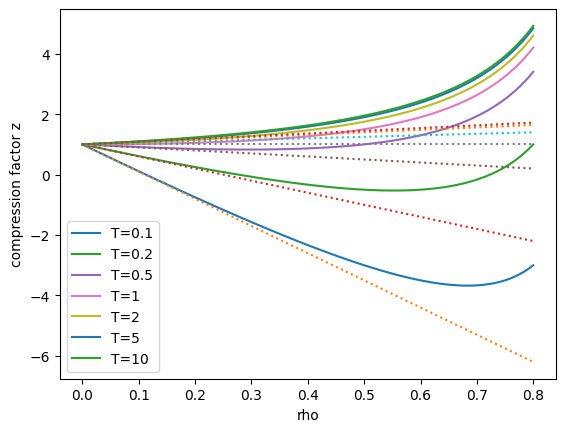

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 密度: 0〜0.8、100等分
rho = np.linspace(0,0.8,100)

# いくつかの温度について
for T in (0.1, 0.2, 0.5, 1, 2, 5, 10):
    # 圧縮因子
    z = 1/(1-rho)-rho/T
    # プロット
    plt.plot(rho, z, label=f"T={T}")
    plt.plot(rho, 1+(1-1/T)*rho, ":")

# x軸のラベル
plt.xlabel("rho")

# y軸のラベル
plt.ylabel("compression factor z")

# 凡例
plt.legend()

一般には横軸に圧力をとることが多いようだ。

密度から圧力に換算してプロットする。


<ipython-input-15-4b9f1518c338>:8: RuntimeWarning: divide by zero encountered in divide
  z = 1/(1-rho)-rho/T


(0.0, 2.0)

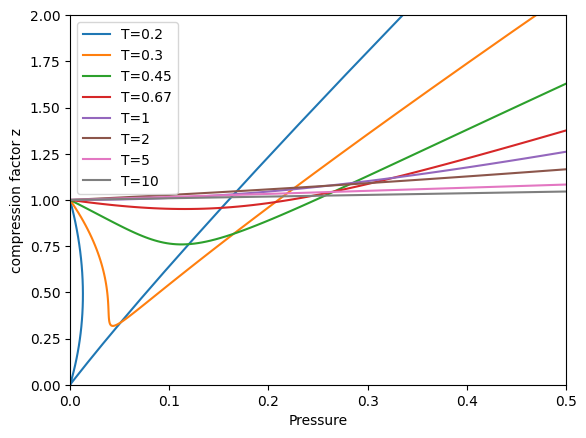

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 密度: 0〜1、100等分
rho = np.linspace(0,1.0,100)

# いくつかの温度について
for T in (0.2, 0.3, 0.45, 0.67, 1, 2, 5, 10):
    # 圧縮因子
    z = 1/(1-rho)-rho/T
    # 圧力
    p = rho * z * T
    # プロット
    plt.plot(p, z, label=f"T={T}")

# x軸のラベル
plt.xlabel("Pressure")

# y軸のラベル
plt.ylabel("compression factor z")

# 凡例
plt.legend()

# 軸の範囲
plt.xlim(0,0.5)
plt.ylim(0,2)


In [ ]:
import sympy

from sympy.abc import p, n, V, a, b, R, T, k, N

NA, rho, a1, b1 = sympy.symbols("N_A rho a1 b1")

sympy.solve((p+(n**2*a/V**2))*(V-n*b)-n*R*T, p)

[n*(R*T*V**2 - V*a*n + a*b*n**2)/(V**2*(V - b*n))]

In [ ]:
p=n*(R*T*V**2 - V*a*n + a*b*n**2)/(V**2*(V - b*n))
(p*V/(n*R*T)).subs(n, N/NA).subs(R, NA*k).subs(N, rho*V).subs(a, a1*NA**2).subs(b, b1*NA).simplify()

(-T*k - a1*b1*rho**2 + a1*rho)/(T*k*(b1*rho - 1))